# Classificação dos Dígitos 1 x 5

### Alunos:

- Caio Lucas da Silva Chacon - 20200025769
- Luiz Fernando Costa dos Santos - 20200025446

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.linear_models as lm
import src.classifier_1x5_utils as utils
import src.metrics as metrics

In [2]:
train = pd.read_csv("./data/train_redu.csv")
test = pd.read_csv("./data/test_redu.csv")

# Selecionando apenas 1 e 5

In [3]:
train1x5 = utils.filter_1x5(train)
test1x5 = utils.filter_1x5(test)

# Plot

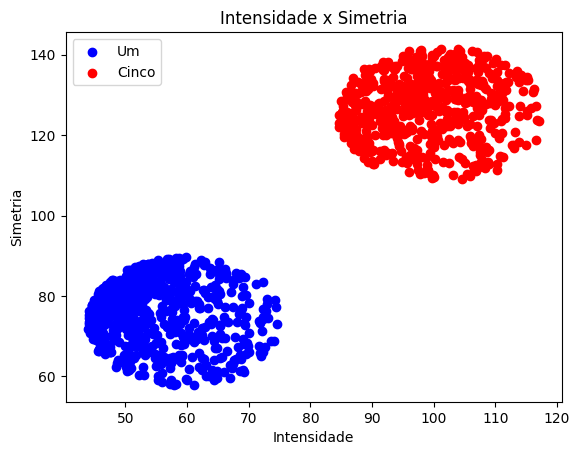

In [4]:
utils.plot1x5(train1x5)

# Treinamento

In [5]:
X_train = train1x5[["intensidade", "simetria"]].values
y_train = train1x5["label"].map(lambda x: -1 if x == 5 else 1).values
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = test1x5[["intensidade", "simetria"]].values
y_test = test1x5["label"].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [6]:
linear_reg = lm.LinearRegression()
linear_reg.fit(X_train, y_train)

In [7]:
logistic_reg = lm.LogisticRegression(eta=0.1, bs=150, tmax=15000)
logistic_reg.fit(X_train, y_train)

In [8]:
pocket_pla = lm.PocketPLA(15000)
pocket_pla.fit(X_train, y_train)

# Predição

In [9]:
transform_digits = lambda x: 5 if x == -1 else 1

y_pred_lreg = list(map(transform_digits, linear_reg.predict(X_test)))
y_pred_rlog = list(map(transform_digits, logistic_reg.predict(X_test)))
y_pred_pla = list(map(transform_digits, pocket_pla.predict(X_test)))

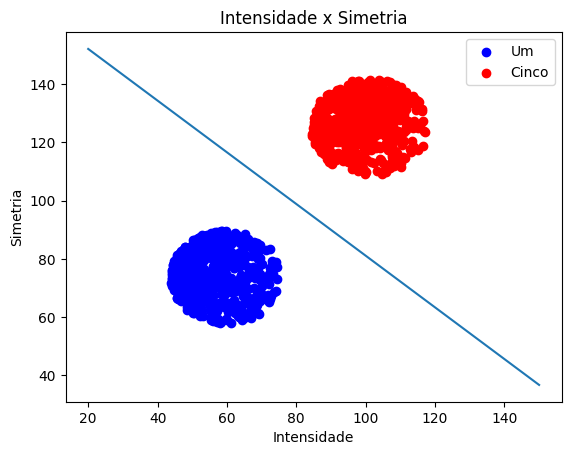

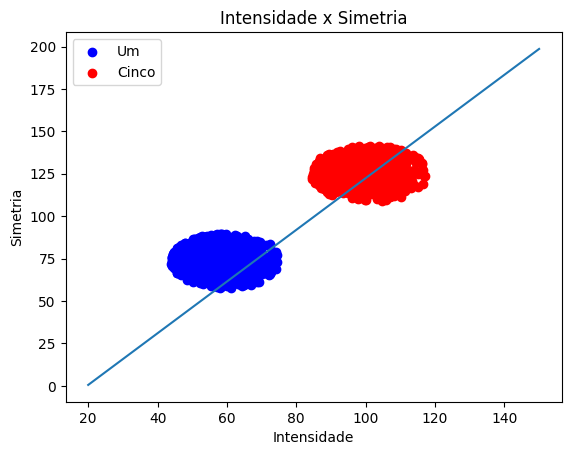

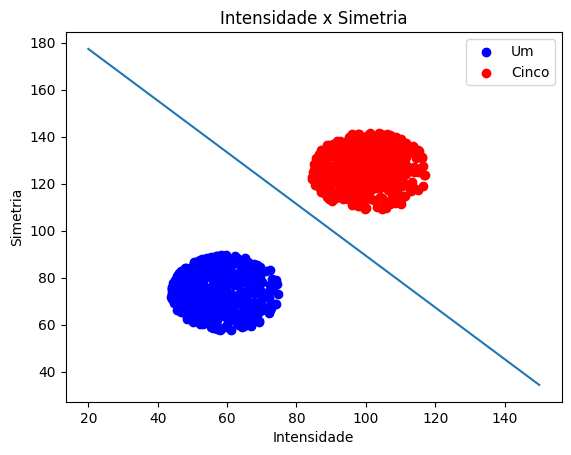

In [10]:
utils.plot1x5(train1x5, linear_reg.get_w())
utils.plot1x5(train1x5, logistic_reg.getW())
utils.plot1x5(train1x5, pocket_pla.get_w())

# Avaliação

### Regressão Linear

In [11]:
print(metrics.classification_report(y_test, y_pred_lreg, class_1 = 1, class_2 = 5))

              precision    recall  f1-score   support

          1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00        291

    accuracy                           1.00       583


In [12]:
metrics.confusion_matrix(y_test, y_pred_lreg, class_1 = 1, class_2 = 5)

array([[292,   0],
       [  0, 291]])

### Regressão Logística

In [13]:
print(metrics.classification_report(y_test, y_pred_rlog, class_1 = 1, class_2 = 5))

              precision    recall  f1-score   support

          1       0.56      0.89      0.69       464
           5       0.72      0.30      0.42        119

    accuracy                           0.59       583


In [14]:
metrics.confusion_matrix(y_test, y_pred_rlog, class_1 = 1, class_2 = 5)

array([[259, 205],
       [ 33,  86]])

### Perceptron

In [15]:
print(metrics.classification_report(y_test, y_pred_pla, class_1 = 1, class_2 = 5))

              precision    recall  f1-score   support

          1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00        291

    accuracy                           1.00       583


In [16]:
metrics.confusion_matrix(y_test, y_pred_pla, class_1 = 1, class_2 = 5)

array([[292,   0],
       [  0, 291]])